# Imports

In [1]:
import pandas as pd
import sqlite3
import seaborn as sns
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
from sklearn.ensemble import RandomForestClassifier
# from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

C:\Users\Kirubha\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Kirubha\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\Kirubha\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


# Exploratory Analysis

In [2]:
df = pd.read_csv("C:\\Users\\Kirubha\\Desktop\\ICU.csv")
del df['Unnamed: 0']
df.head(5)

,ID,Survive,Age,AgeGroup,Sex,Infection,SysBP,Pulse,Emergency
0,4,0,87,3,1,1,80,96,1
1,8,1,27,1,1,1,142,88,1
2,12,1,59,2,0,0,112,80,1
3,14,1,77,3,0,0,100,70,0
4,27,0,76,3,1,1,128,90,1


In [3]:
a = df
a.groupby(['Age','Sex','Emergency']).sum()


ID  Survive  AgeGroup  Infection  SysBP  Pulse
Age Sex Emergency                                                  
16  0   1           552        1         1          0    100    140
    1   1           102        1         1          0    104    111
17  0   1          1692        2         2          0    276    156
    1   1           837        1         1          0    130    140
18  0   0           894        2         2          0    286    239
...                 ...      ...       ...        ...    ...    ...
88  1   0           546        1         3          0    110     46
        1          1061        2         6          1    330    176
89  1   1           881        1         3          0    190    114
91  0   1           878        1         6          2    216    250
92  0   1           165        0         3          1    124     80

[127 rows x 6 columns]

In [4]:
df.isna().any() #no null values

ID           False
Survive      False
Age          False
AgeGroup     False
Sex          False
Infection    False
SysBP        False
Pulse        False
Emergency    False
dtype: bool

In [5]:
df.duplicated().any() #no duplicates

False

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         200 non-null    int64
 1   Survive    200 non-null    int64
 2   Age        200 non-null    int64
 3   AgeGroup   200 non-null    int64
 4   Sex        200 non-null    int64
 5   Infection  200 non-null    int64
 6   SysBP      200 non-null    int64
 7   Pulse      200 non-null    int64
 8   Emergency  200 non-null    int64
dtypes: int64(9)
memory usage: 14.2 KB


In [7]:
sorted(df[df['AgeGroup']==1]['Age'].values) #16-49 : Below 50
sorted(df[df['AgeGroup']==2]['Age'].values) #50-69 : 50-69
sorted(df[df['AgeGroup']==3]['Age'].values) #70-92 : 70 and above

[70,
 70,
 70,
 70,
 70,
 70,
 71,
 71,
 71,
 71,
 71,
 71,
 72,
 72,
 72,
 72,
 72,
 73,
 73,
 73,
 73,
 74,
 74,
 75,
 75,
 75,
 75,
 75,
 75,
 75,
 75,
 76,
 76,
 76,
 76,
 77,
 77,
 77,
 77,
 77,
 77,
 78,
 78,
 78,
 78,
 79,
 80,
 80,
 80,
 82,
 82,
 83,
 84,
 85,
 87,
 87,
 88,
 88,
 88,
 88,
 89,
 91,
 91,
 92]

In [8]:
numDF = df[['Age','SysBP','Pulse']]
numDF.describe() 

,Age,SysBP,Pulse
count,200.000000,200.000000,200.00000
mean,57.545000,132.280000,98.92500
std,20.054648,32.952099,26.82962
min,16.000000,36.000000,39.00000
25%,46.750000,110.000000,80.00000
50%,63.000000,130.000000,96.00000
75%,72.000000,150.000000,118.25000
max,92.000000,256.000000,192.00000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         200 non-null    int64
 1   Survive    200 non-null    int64
 2   Age        200 non-null    int64
 3   AgeGroup   200 non-null    int64
 4   Sex        200 non-null    int64
 5   Infection  200 non-null    int64
 6   SysBP      200 non-null    int64
 7   Pulse      200 non-null    int64
 8   Emergency  200 non-null    int64
dtypes: int64(9)
memory usage: 14.2 KB


In [10]:
df.columns

Index(['ID', 'Survive', 'Age', 'AgeGroup', 'Sex', 'Infection', 'SysBP',
       'Pulse', 'Emergency'],
      dtype='object')

In [11]:
for col in df.columns:
    print(col,':',df[col].duplicated().any())
#All except ID has duplicates --> ID is unique key

ID : False
Survive : True
Age : True
AgeGroup : True
Sex : True
Infection : True
SysBP : True
Pulse : True
Emergency : True


# SQLite Connection

In [12]:
con = sqlite3.connect('icu.db')
cursor = con.cursor()

In [13]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
db_tables= [x[0] for x in cursor.fetchall()] 
print(db_tables)

[]


In [14]:
# cursor.execute('DROP TABLE age_groups')
# cursor.execute('DROP TABLE sexes')
# cursor.execute('DROP TABLE patients')
# cursor.execute('DROP TABLE patient_visits')

## Create Tables

In [15]:
sql_commands = [    
    """
    CREATE TABLE if not Exists age_groups (
    age_group_id INTEGER PRIMARY KEY,
    age_group_name TEXT
    )
    """,
    
    """
    CREATE TABLE if not Exists sexes (
    sex_id INTEGER PRIMARY KEY,
    sex_name TEXT
    )
    """,
    
    """ 
    CREATE TABLE if not Exists patients (
    patient_id INTEGER PRIMARY KEY,
    age INTEGER,
    age_group_id INTEGER,
    sex_id INTEGER,
    FOREIGN KEY (age_group_id) REFERENCES age_groups (age_group_id),
    FOREIGN KEY (sex_id) REFERENCES sexes (sex_id)
    )
    """,
    
    """
    CREATE TABLE if not Exists patient_visits (
    patient_id INTEGER,
    survive BOOLEAN,
    infection BOOLEAN,
    sys_bp INTEGER,
    pulse INTEGER,
    emergency BOOLEAN,
    FOREIGN KEY (patient_id) REFERENCES patients (patient_id)
    )
    """
    
    
]

for command in sql_commands:
    cursor.execute(command)


In [16]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
db_tables= [x[0] for x in cursor.fetchall()] 
print(db_tables)

['age_groups', 'sexes', 'patients', 'patient_visits']


## Insert Values

In [17]:
update_tables = [
"""
INSERT INTO age_groups (age_group_id, age_group_name)
VALUES (1,'Below 50'), (2,'50-69'), (3,'70 and above')
""",
"""
INSERT INTO sexes (sex_id, sex_name)
VALUES (0,'Female'),(1,'Male')
"""
]


for command in update_tables:
    cursor.execute(command)

In [18]:
patient_values = ''
for row in range(len(df)):
    pid = df.loc[row,'ID']
    age = df.loc[row,'Age']
    agegrp = df.loc[row,'AgeGroup']
    sex = df.loc[row,'Sex']
    val = '('+str(pid)+','+str(age)+','+str(agegrp)+','+str(sex)+')'
    if row!=(len(df)-1):
        val+=', '
    patient_values += val
# print(patient_values)

patient_command = """
INSERT INTO patients (patient_id,age,age_group_id,sex_id)
VALUES """ + patient_values

cursor.execute(patient_command)

In [19]:
visit_values = ''
for row in range(len(df)):
    pid = df.loc[row,'ID']
    survive = df.loc[row,'Survive']
    inf = df.loc[row,'Infection']
    sysbp = df.loc[row,'SysBP']
    pulse = df.loc[row,'Pulse']
    ems = df.loc[row,'Emergency']
    val = '('+str(pid)+','+str(survive)+','+str(inf)+','+str(sysbp)+','+str(pulse)+','+str(ems)+')'
    if row!=(len(df)-1):
        val+=', '
    visit_values += val
# print(patient_values)

patient_visit_command = """
INSERT INTO patient_visits (patient_id,survive,infection,sys_bp,pulse,emergency)
VALUES """ + visit_values

cursor.execute(patient_visit_command)

In [20]:
data=cursor.execute('SELECT * FROM ' +str(db_tables[3])) #just to check
data_descr=[x[0] for x in data.description]
print(data_descr)


['patient_id', 'survive', 'infection', 'sys_bp', 'pulse', 'emergency']


In [21]:
con.commit()
con.close()

# Reading tables from SQLite Database

In [22]:
conn = sqlite3.connect('icu.db')

patients_df = pd.read_sql_query("SELECT * FROM patients", conn)

age_groups_df = pd.read_sql_query("SELECT * FROM age_groups", conn)

sexes_df = pd.read_sql_query("SELECT * FROM sexes", conn)

patient_visits_df = pd.read_sql_query("SELECT * FROM patient_visits", conn)

conn.close()

In [23]:
patients_df = patients_df.merge(age_groups_df, on='age_group_id')
patients_df = patients_df.merge(sexes_df, on='sex_id')
merged_all_df = patients_df.merge(patient_visits_df, on='patient_id')

In [24]:
merged_all_df

,patient_id,age,age_group_id,sex_id,age_group_name,sex_name,survive,infection,sys_bp,pulse,emergency
0,4,87,3,1,70 and above,Male,0,1,80,96,1
1,27,76,3,1,70 and above,Male,0,1,128,90,1
2,32,87,3,1,70 and above,Male,1,1,110,154,1
3,50,70,3,1,70 and above,Male,1,0,138,103,0
4,137,74,3,1,70 and above,Male,1,0,170,92,0
...,...,...,...,...,...,...,...,...,...,...,...
195,867,60,2,0,50-69,Female,1,1,108,120,1
196,871,60,2,0,50-69,Female,0,1,130,55,1
197,875,69,2,0,50-69,Female,1,0,169,73,1
198,915,67,2,0,50-69,Female,1,0,152,78,0


# Visualizations

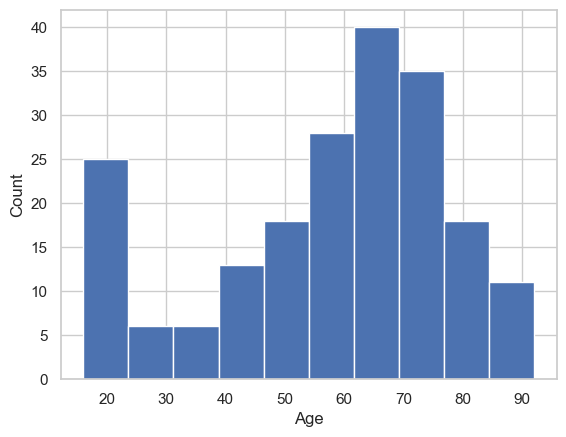

In [25]:
plt.hist(patients_df['age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Index(['patient_id', 'age', 'age_group_id', 'sex_id', 'age_group_name',
       'sex_name', 'survive', 'infection', 'sys_bp', 'pulse', 'emergency'],
      dtype='object')


<AxesSubplot:>

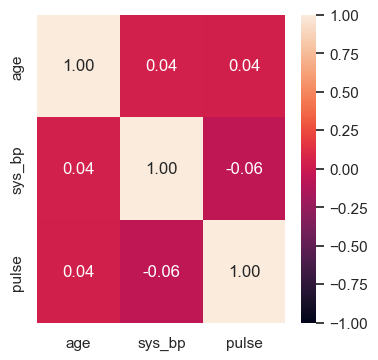

In [26]:
# numeric variables heatmap
patient_data = patients_df.merge(patient_visits_df, on='patient_id')
print(patient_data.columns)
f, axes = plt.subplots(1, 1, figsize=(4,4))
sns.heatmap(patient_data[['age','sys_bp','pulse']].corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f") 

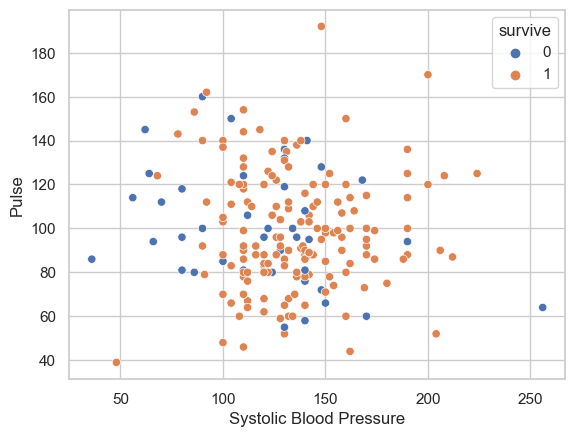

In [27]:
patient_data = patients_df.merge(patient_visits_df, on='patient_id')
sns.scatterplot(x='sys_bp', y='pulse', hue='survive', data=patient_data)
plt.xlabel('Systolic Blood Pressure')
plt.ylabel('Pulse')
plt.show()

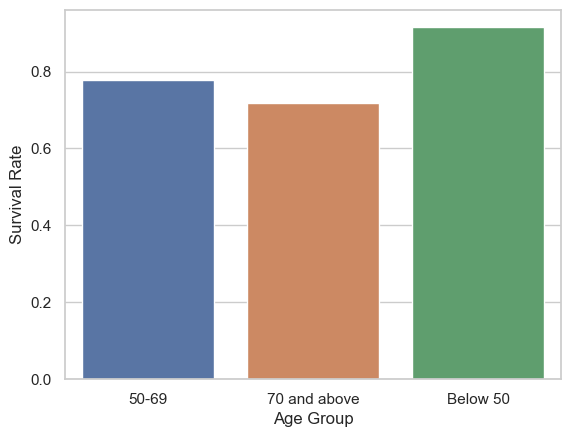

In [28]:
patient_data = patient_data.merge(age_groups_df, on='age_group_id')

survival_rate_by_age = patient_data.groupby(['age_group_name_x', 'survive']).size().unstack().reset_index()
survival_rate_by_age['Survival Rate'] = survival_rate_by_age[True] / (survival_rate_by_age[True] + survival_rate_by_age[False])
sns.barplot(x='age_group_name_x', y='Survival Rate', data=survival_rate_by_age)
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.show()

<AxesSubplot:xlabel='age_group_name', ylabel='sys_bp'>

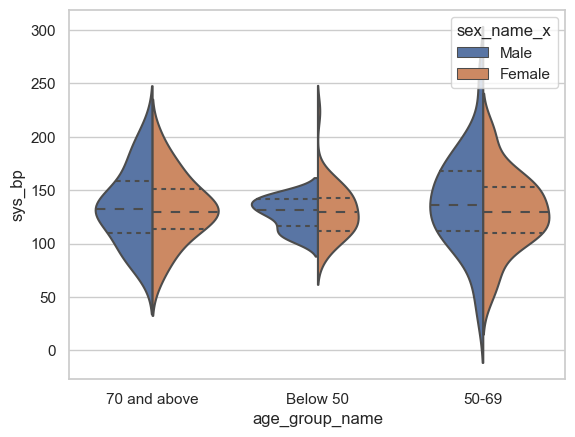

In [29]:
#females vs males blood pressures w.r.t age grps 
patient_data = patients_df.merge(patient_visits_df, on='patient_id')
patient_data = patient_data.merge(sexes_df, on='sex_id')
patient_data.columns
sns.violinplot(data=patient_data, x='age_group_name', y='sys_bp', hue='sex_name_x',  inner='quartile', split=True)

<AxesSubplot:xlabel='survive', ylabel='count'>

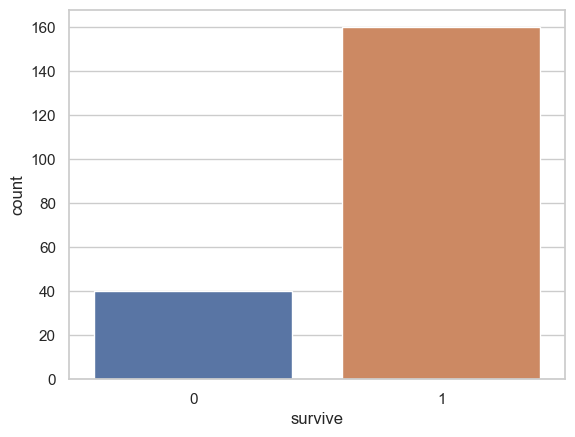

In [30]:
#class imbalance
sns.countplot(x=patient_visits_df["survive"])

# Machine Learning

## Resampling Response Variable ("Survive")

In [31]:
df_majority = merged_all_df[merged_all_df.survive==1]
df_minority = merged_all_df[merged_all_df.survive==0]

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=50) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Check class distribution after upsampling
print(df_upsampled.survive.value_counts())

1    160
0    160
Name: survive, dtype: int64


<AxesSubplot:xlabel='survive', ylabel='count'>

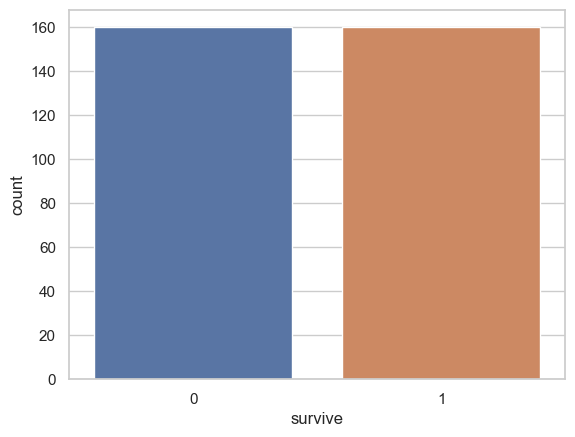

In [32]:
sns.countplot(x=df_upsampled["survive"])

## Train-Test split

In [33]:
# Extract Response and Predictors
y = pd.DataFrame(df_upsampled["survive"])
X = pd.DataFrame(df_upsampled[['age_group_id', 'sex_id', 'infection', 'sys_bp', 'pulse','emergency']])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (240, 1) (240, 6)
Test Set  : (80, 1) (80, 6)


## Random Forest 

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9666666666666667

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.825



<AxesSubplot:>

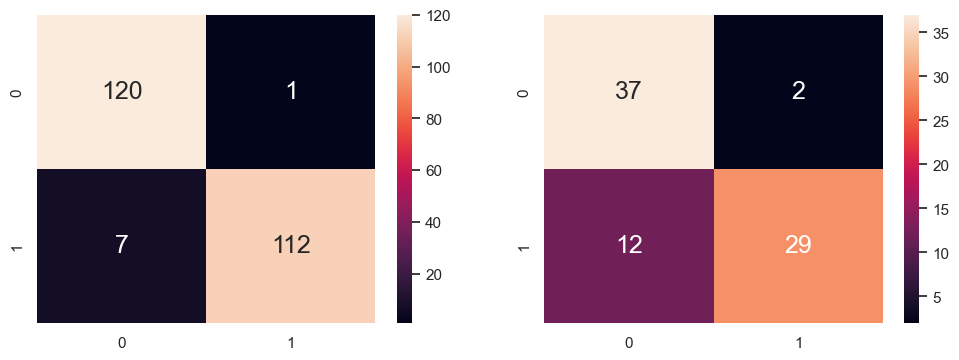

In [43]:
rforest = RandomForestClassifier(n_estimators = 100, max_depth = 6)  
rforest.fit(X_train, y_train.values.ravel())                         

y_train_pred = rforest.predict(X_train)
y_test_pred_rf = rforest.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rforest.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rforest.score(X_test, y_test))
print()
rfscore = rforest.score(X_test, y_test)

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sns.heatmap(confusion_matrix(y_test, y_test_pred_rf), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [44]:
## Calculating feature importance
feature_importances = pd.DataFrame(rforest.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance', ascending = False)
print(feature_importances)

              importance
sys_bp          0.357260
pulse           0.275178
age_group_id    0.119312
emergency       0.112418
infection       0.084662
sex_id          0.051171


## Decision Tree

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9333333333333333

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7375



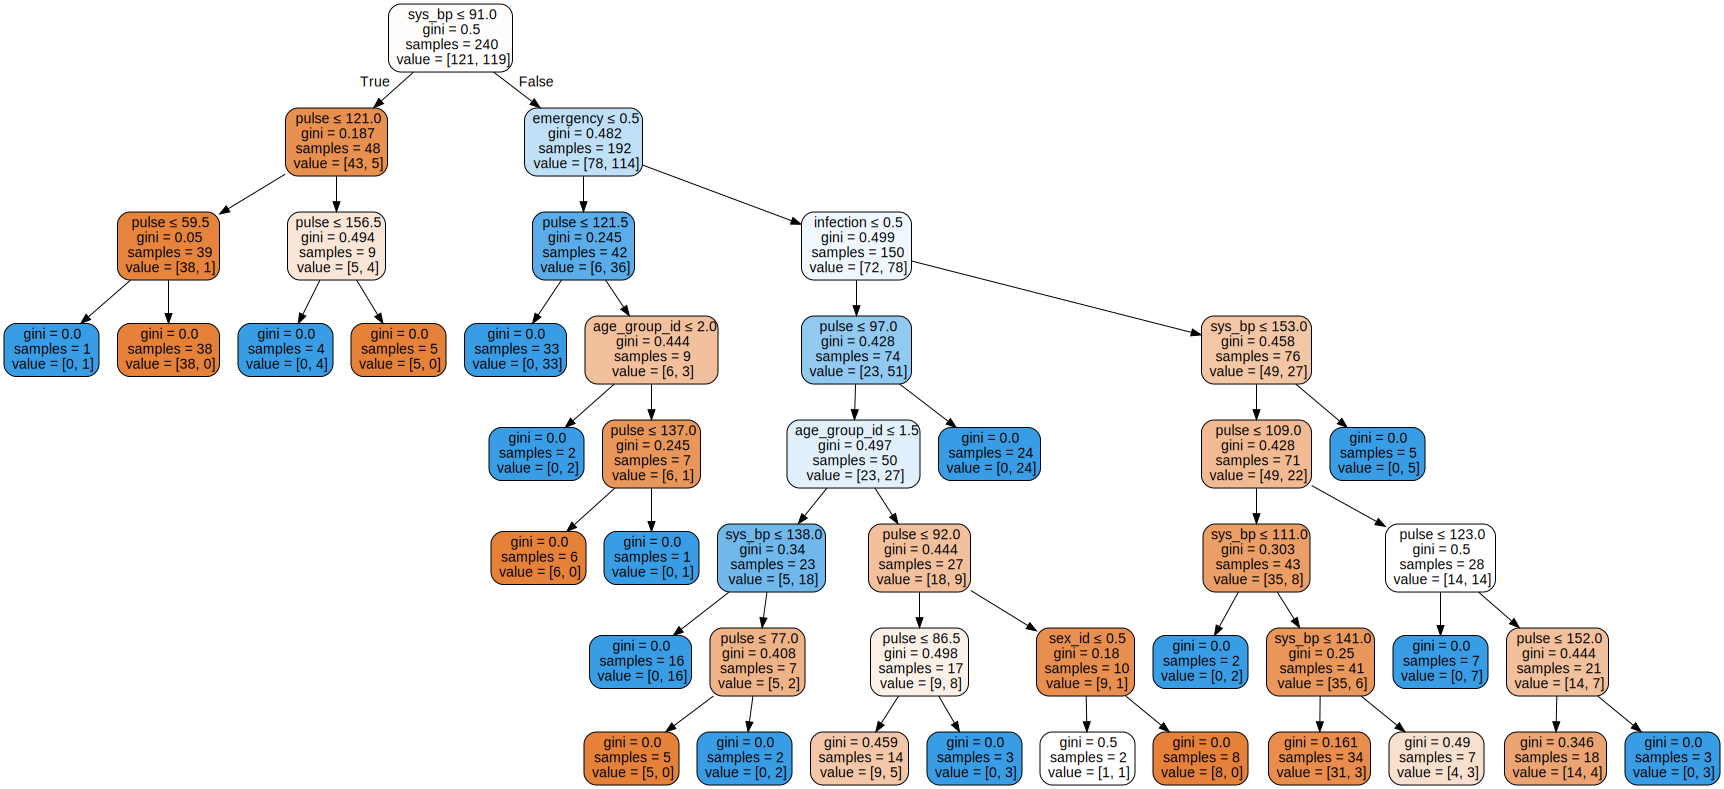

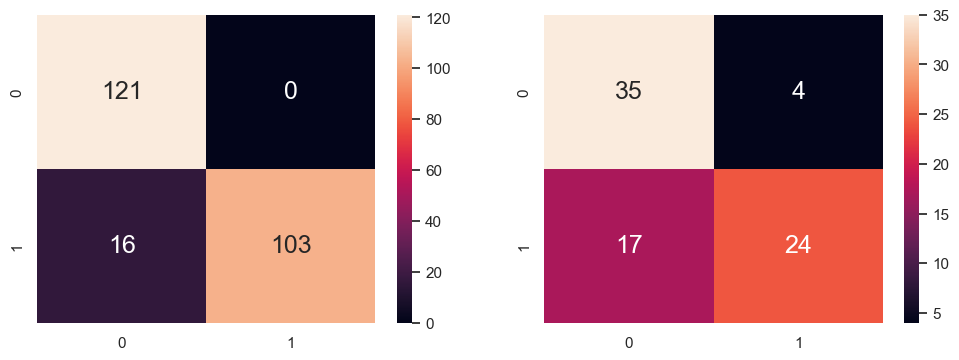

In [36]:
dectree = DecisionTreeClassifier(max_depth = 7)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

y_train_pred = dectree.predict(X_train)
y_test_pred_dt = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()
decscore=dectree.score(X_test, y_test)

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sns.heatmap(confusion_matrix(y_test, y_test_pred_dt), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the Decision Tree
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

graphviz.Source(treedot)

## Logistic Regression

In [55]:
lr = LogisticRegression()
param_grid = {'penalty': ['l1','l2','elasticnet',None],'C': [0.01, 0.1, 1],'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}
grid_search = GridSearchCV(lr, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(best_params) #{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'} -- all default values

C:\Users\Kirubha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Kirubha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Kirubha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Kirubha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

C:\Users\Kirubha\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
C:\Users\Kirubha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Kirubha\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
C:\Users\Kirubha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Kirubha\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarnin

C:\Users\Kirubha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Kirubha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Kirubha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Kirubha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}


C:\Users\Kirubha\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
C:\Users\Kirubha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Kirubha\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
C:\Users\Kirubha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Kirubha\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarnin

C:\Users\Kirubha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Kirubha\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7625

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6375



<AxesSubplot:>

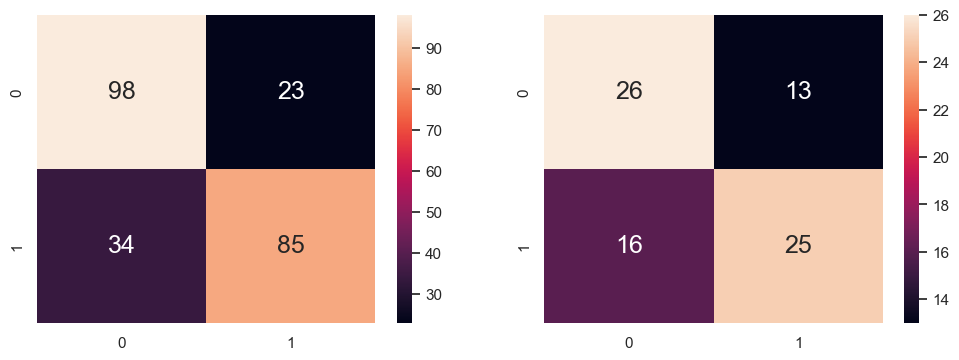

In [37]:
lr = LogisticRegression()
lr.fit(X_train, y_train.values)

y_train_pred = lr.predict(X_train)
y_test_pred_lr = lr.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", lr.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", lr.score(X_test, y_test))
print()

lrscore = lr.score(X_test, y_test)

#Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sns.heatmap(confusion_matrix(y_test, y_test_pred_lr), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

## Performance Comparison

In [38]:
lr_acc = accuracy_score(y_test, y_test_pred_lr)
dt_acc = accuracy_score(y_test, y_test_pred_dt)
rf_acc = accuracy_score(y_test, y_test_pred_rf)

lr_prec = precision_score(y_test, y_test_pred_lr)
dt_prec = precision_score(y_test, y_test_pred_dt)
rf_prec = precision_score(y_test, y_test_pred_rf)

lr_recall = recall_score(y_test, y_test_pred_lr)
dt_recall = recall_score(y_test, y_test_pred_dt)
rf_recall = recall_score(y_test, y_test_pred_rf)

lr_f1 = f1_score(y_test, y_test_pred_lr)
dt_f1 = f1_score(y_test, y_test_pred_dt)
rf_f1 = f1_score(y_test, y_test_pred_rf)

print("Logistic Regression - Accuracy:", lr_acc, "Precision:", lr_prec, "Recall:", lr_recall, "F1-score:", lr_f1)
print("Decision Tree - Accuracy:", dt_acc, "Precision:", dt_prec, "Recall:", dt_recall, "F1-score:", dt_f1)
print("Random Forest - Accuracy:", rf_acc, "Precision:", rf_prec, "Recall:", rf_recall, "F1-score:", rf_f1)

Logistic Regression - Accuracy: 0.6375 Precision: 0.6578947368421053 Recall: 0.6097560975609756 F1-score: 0.6329113924050632
Decision Tree - Accuracy: 0.7375 Precision: 0.8571428571428571 Recall: 0.5853658536585366 F1-score: 0.6956521739130435
Random Forest - Accuracy: 0.825 Precision: 0.9354838709677419 Recall: 0.7073170731707317 F1-score: 0.8055555555555556


In [39]:
accuracies = [dt_acc,rf_acc,lr_acc]
f1_scores = [dt_f1,rf_f1,lr_f1]
models = ['Decision Tree','Random Forest','Logistic Regression']
print(accuracies)
print(f1_scores)

[0.7375, 0.825, 0.6375]
[0.6956521739130435, 0.8055555555555556, 0.6329113924050632]


<AxesSubplot:xlabel='Model', ylabel='Score'>

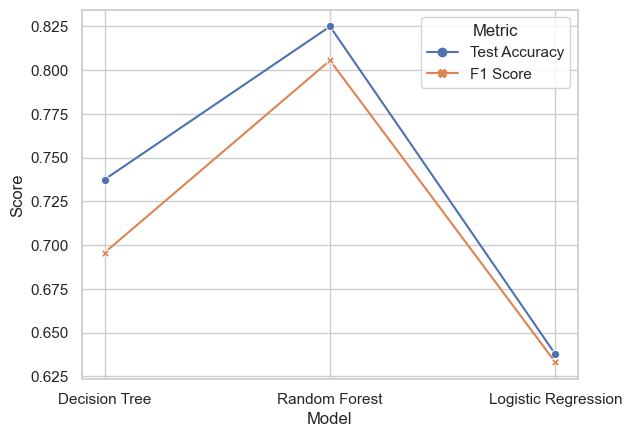

In [40]:
#plot acc + F1 
data = pd.DataFrame(
    {'Model': models,
     'Test Accuracy': accuracies,
     'F1 Score': f1_scores
    })
sns.lineplot(x='Model', y='Score', hue='Metric', markers=True,style="Metric",dashes=False,
             data=pd.melt(data, ['Model'],var_name='Metric', value_name='Score'))

The best model in terms of F1 score and accuracy on test set is Random Forest. Thus, it is the best performing model for this dataset. The most important features are Systolic Blood Pressure and Pulse Rate.